![DSB logo](img/Dolan.jpg)
# Data Types

## PD4E Chapter 7: Data Types
### How do you read/manipulate/store data in Python?

# What You Learned in Python/Pandas that could Apply Here

You will need following knowledge from the first half of this course:
1. functions and methods (definitions and calls)
2. subsetting/slicing data
3. loops
4. list comprehension

# What You will Learn in this Chapter
You will learn following techniques in this chapter:
1. finding data types of columns in a DF
2. converting between data types
3. working with __categorical data__

# Data Types

- When we talk about data types, we essentially talk about _attribute types_
    - _attributes_ are columns or features in a dataset
    - different categorizations of attribute types are used in analyitics
        - quantitative vs. qualitative
        - continuous vs. discrete
        - numerical vs. categorical
    - but they essentially refer to the same split
        - some data has numerical value with numeical semantics, e.g., age, income
        - some data may not have numerical values, or even they do have numerical values, there is not numerical semantics, e.g., _age group_, _income group_

In [1]:
# we will use the built-in dataset from 'seaborn' as an example
import pandas as pd
import seaborn as sns

tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# look at data types
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Why to differentiate?

- Firstly, we use _categorical_ data as categories
    - this is particularly useful when we try to compare two or more categories in the data
    - but note that whatever we try to compare __must be__ continuous data

In [3]:
# we try to compare average 'tip' - continuous data
# across different 'sex' groups - categorical data
tips_data['tip'].groupby(tips_data['sex']).mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [4]:
# another example
# we try to compare average 'total_bill' - continuous data
# across different 'size' groups - categorical data
# note even `size` appear to be numeric, it is a categorical feature
tips_data['total_bill'].groupby(tips_data['size']).mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

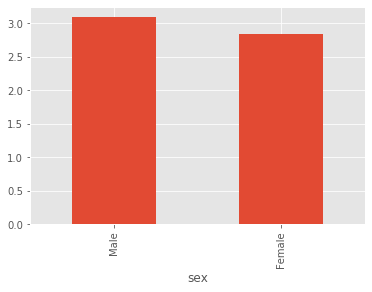

In [6]:
# Why do above? 
# Usually we want to find some obvious patterns 
# by looking at the data
tips_data['tip'].groupby(tips_data['sex']).mean().plot(kind='bar', rot=90)

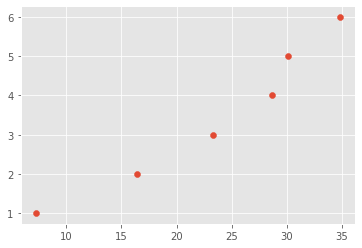

In [18]:
# aother example
# normally pandas does not allow scatter plot over Series
# This is an elegant way of a work-around
bill_vs_size = tips_data['total_bill'].groupby(tips_data['size']).mean()
plt.scatter(bill_vs_size, bill_vs_size.index)

In [19]:
# class discussion what is the bill_vs_size.index
# groupsize
bill_vs_size

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

# Your Turn Here

Can you observe any pattern from above figures?

In [20]:
# Anthonie Hollaar
# Date: 11-26-2019
# Answer: The larger the group size the larger the average total bill

# Your Turn Here

Similar to code block `[7]` above, can you create a figure of scatter plot between `tip` and `size`. Also, can you observe any pattern from the figure you just created?

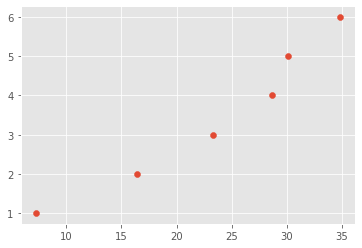

In [22]:
# your code here
# Anthonie Hollaar
# Date: 11-26-2019
tips_data['total_bill'].groupby(tips_data['size']).mean()
plt.scatter(bill_vs_size, bill_vs_size.index)

# pattern: the larger the tip the larger the group size will be 
# Could also be the larger the group size the larger the tip => want the x axis variable to explain the y axis variable 
# Causality makes more sense if the x- and y axis were flipped in this case)

# Converting Data Types

- As any column in a `pandas` DataFrame, the data types determine what functions/methods are applicable
- `pandas` do not always recognize the correct data type automatically
- So it is important to know how to convert data between
    - how to convert `string` type to numeric values (__qualitative -> quantitative__)
    - how to convert _numeric_ values (e.g., `float`, `int`) to `string` objects (__quantitative -> qualitative__)
- Note that you do not have to do all type conversion at once

# Convert Numeric Values to String Objects

- There are several occasions that the features appear to be numeric but they do not have numeric semantics
    - e.g., a lot of datasets contain an `id` column (feature), which are usually numbers
    - but they do not have numeric semantics - e.g., calculating the _mean_ of the column has no meaning
    - in the latest `pandas` versions, any column contains `string` values are automatically recognized as `category`
    - but when we need them in machine learning, we need to convert them to `string` __objects__

In [24]:
# e.g., we can convert the column `sex` to `object`
# note we alway create a new column for the converted column
tips_data['sex_str'] = tips_data['sex'].astype(str)
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Convert to Numeric Values

- As you saw above, `.astype()` is a generic method convert a column to another data type
- `.astype()` is a method for `pandas` Series - see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html)
- you can use any Python built-in data types, or `Numpy` data types
    - here is a match between `Python` and `Numpy` data types (see [here](https://docs.scipy.org/doc/numpy/user/basics.types.html) for a complete list)

| Python | Numpy |
| ------ | ----- |
| `float` | `float64` |
| `int` | `int64` |
| `datetime` | `datetime64` |

In [25]:
# first convert `total_bill` to the `string` type
tips_data['total_bill'] = tips_data['total_bill'].astype(str)
tips_data.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [26]:
# Now let's convert this column back
tips_data['total_bill'] = tips_data['total_bill'].astype(float) 
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# `to_numeric` function

- we can use a `pandas` specific function called `.to_numeric()`
- to convert any column to numeric values
- the benefit of using this function, over the `.astype()` method is that 
    - `to_numetic()` can handle errors

In [27]:
# subset the first ten rows in `tips_data`
tips_subset = tips_data.head(10)

# set some values to `'missing'`
tips_subset.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'

tips_subset

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [28]:
# because of the `'missing'` values inserted
# the data type of the column is changed
tips_subset.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [29]:
# this will create an error
tips_subset['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [30]:
# this will create a similar error
pd.to_numeric(tips_subset['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [31]:
# but `to_numeric()` can handle errors using differet way
tips_subset['total_bill'] = pd.to_numeric(tips_subset['total_bill'], errors = 'ignore')
tips_subset.head(5)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [32]:
# note that the values causing errors are ignored
# we can also force the conversion
tips_subset['total_bill'] = pd.to_numeric(tips_subset['total_bill'], errors = 'coerce')
tips_subset.head(5)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,NaN,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,NaN,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [33]:
# look at how the data type is converted
tips_subset.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Categorical Data

- Not all data are numeric, `pandas` support categoical data natively [doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)
- Categorical data are particularly useful when:
    - if the `string` values are highly repeatable (e.g., `sex`), we should use categorical since it is memory and speed efficient
    - if the value of a column have some kind of order 
    - categorical data is optimized in some libraries

In [34]:
# convert `sex` to `object`
tips_data['sex'] = tips_data['sex'].astype(str)
tips_data.dtypes

total_bill     float64
tip            float64
sex             object
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [35]:
# convert it back to categorical
tips_data['sex'] = tips_data['sex'].astype('category')
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Why Categorical Data?

- categorical data are very popular in data analytics
- in BA545, we have a specific lecture on handling categorical data
- you can refer to [this link](https://www.geeksforgeeks.org/python-pandas-categorical/) or [this link](http://benalexkeen.com/mapping-categorical-data-in-pandas/) for more information regarding categorical data

# Discretization

- sometime you may want to convert numeric (_continuous_) data into discrete (_categorical_) data
    - the best example would be _histogram_ 
    - have you ever wondered how histogram works
- also, we often conduct discretization on continuous data
    - so that we can convert age into age groups, ...

In [36]:
# generate a Series of continuous values and call it ages
import random

age_series = pd.Series(random.sample(range(1, 101), 30), name='ages')
age_series.head()

0    27
1    21
2    49
3    13
4    67
Name: ages, dtype: int64

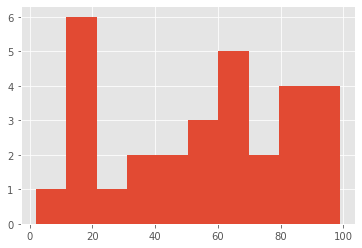

In [37]:
# create a histogram
# note how the continuous values are discretized?
age_series.hist()

In [38]:
# we can convert the data to follow this fashion
bucket = [1, 10, 20, 30,  40, 50, 60, 70, 80, 90, 100]

# the `.cut()` function can discretize this data for use
age_cut = pd.cut(age_series, bucket)
age_cut.head()

0    (20, 30]
1    (20, 30]
2    (40, 50]
3    (10, 20]
4    (60, 70]
Name: ages, dtype: category
Categories (10, interval[int64]): [(1, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

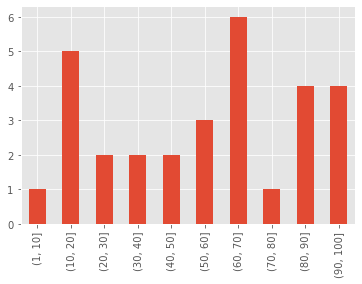

In [39]:
age_cut.value_counts().sort_index().plot(kind='bar')

# Logical Discretization

In [40]:
# we can even discretize the data by other logic
# e.g., under-age, adult, retired

new_bucket = [1, 21, 60, 100]
new_age_cut = pd.cut(age_series, new_bucket)
new_age_cut.head()

0     (21, 60]
1      (1, 21]
2     (21, 60]
3      (1, 21]
4    (60, 100]
Name: ages, dtype: category
Categories (3, interval[int64]): [(1, 21] < (21, 60] < (60, 100]]

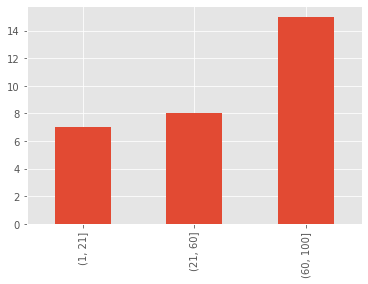

In [41]:
new_age_cut.value_counts().sort_index().plot(kind='bar')

![DSB logo](img/Dolan.jpg)
# Data Types

## PD4E Chapter 7: Data Types
### How do you read/manipulate/store data in Python?

![DSB logo](img/Dolan.jpg)
# String Data

## PD4E Chapter 8: String and Text Data
### How do you read/manipulate/store data in Python?

# Review Chapter 6 and 11 in PY4E

- We have covered strings and RegEx in the first half of the course
- please review them since this part is very similar

# Your Turn Here
Finish exercises below by following instructions of each of them.

## Q1. Coding Problem

Complete exercises regarding data types of the given DataFrame (`itinery_df`).

In [150]:
import random
import pandas as pd

# generating the DF
durations = pd.Series(random.sample(range(1, 30), 20), name='durations')
work_types = ['lecture', 'consulting', 'research']
work_type_series = pd.Series(random.choices(work_types, k=20), name='work_types')
locations = ['Beijing, China', 'London, England', 'Paris, France', 'Munich, Germany', 
             'Sydney, Australia', 'Mumbai, India', 'Madrid, Spain']
loc_series = pd.Series(random.choices(locations, k=20), name='locations')
hour_rates = pd.Series(random.sample(range(50, 100), 20), name='hour_rates')
hour_rates.loc[[2, 5, 7, 12, 16, 17]] = 'missing'
itinery_df = pd.concat([durations, work_type_series, loc_series, hour_rates], axis=1)
itinery_df['durations'] = itinery_df['durations'].astype(str)
itinery_df.head()

,durations,work_types,locations,hour_rates
0,8,research,"London, England",80
1,27,research,"Paris, France",70
2,1,lecture,"Beijing, China",missing
3,24,consulting,"Mumbai, India",61
4,7,consulting,"London, England",63


## Part 1:

Find the data types for the columns in `itinery_df`.

In [151]:
itinery_df.dtypes

durations     object
work_types    object
locations     object
hour_rates    object
dtype: object

## Part 2:

Calculate the total payment for each row, $ payment_{total} = duration \times hour\_rate $.

In order to do that, you need to:
1. convert the `durations` and `hour_rates` to numerical (integer) type.
2. handle all `'missing'` values in the `hour_rates` column - use the average of the column to replace missing values.
3. create a new column namely `payments`, then put the calculation results in it.

In [152]:
# step 1: convert the durations and hour_rates to numerical (integer) type.
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
itinery_df['durations'] = pd.to_numeric(itinery_df['durations'], errors = 'coerce', downcast='integer')
itinery_df['hour_rates'] = pd.to_numeric(itinery_df['hour_rates'], errors = 'coerce',  downcast='integer').round(2)

# show the data types after conversion to check if they indeed changed to numerical type
print(itinery_df.dtypes)
itinery_df

durations        int8
work_types     object
locations      object
hour_rates    float64
dtype: object


,durations,work_types,locations,hour_rates
0,8,research,"London, England",80.0
1,27,research,"Paris, France",70.0
2,1,lecture,"Beijing, China",NaN
3,24,consulting,"Mumbai, India",61.0
4,7,consulting,"London, England",63.0
5,18,research,"Beijing, China",NaN
6,6,lecture,"Sydney, Australia",95.0
7,2,lecture,"Madrid, Spain",NaN
8,5,lecture,"Munich, Germany",50.0
9,17,research,"Madrid, Spain",52.0


In [153]:
# step 2: handle all 'missing' values in the hour_rates column - use the average of the column to replace missing values.
itinery_df['hour_rates'] = pd.to_numeric(itinery_df['hour_rates'], errors = 'coerce')

# calculate the mean for the hour_rates column
print(itinery_df['hour_rates'].mean())

# fill the NaN values with the mean
# source: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
itinery_df['hour_rates'] = itinery_df['hour_rates'].fillna(itinery_df['hour_rates'].mean()).round(2)

# show dataframe and check if the average of ~77.64 is replacing the NaN values for index 2, 5, 7, 12, 16, 17
itinery_df

72.28571428571429


,durations,work_types,locations,hour_rates
0,8,research,"London, England",80.00
1,27,research,"Paris, France",70.00
2,1,lecture,"Beijing, China",72.29
3,24,consulting,"Mumbai, India",61.00
4,7,consulting,"London, England",63.00
5,18,research,"Beijing, China",72.29
6,6,lecture,"Sydney, Australia",95.00
7,2,lecture,"Madrid, Spain",72.29
8,5,lecture,"Munich, Germany",50.00
9,17,research,"Madrid, Spain",52.00


In [154]:
# step 3: create a new column namely payments, then put the calculation results in it.
# formula: 𝑝𝑎𝑦𝑚𝑒𝑛𝑡 𝑡𝑜𝑡𝑎𝑙= 𝑑𝑢𝑟𝑎𝑡𝑖𝑜𝑛 × ℎ𝑜𝑢𝑟_𝑟𝑎𝑡𝑒
itinery_df['payments'] = itinery_df['durations']*itinery_df['hour_rates']

# show new dataframe and check if column payments is added with correct calculation of formula
itinery_df

,durations,work_types,locations,hour_rates,payments
0,8,research,"London, England",80.00,640.00
1,27,research,"Paris, France",70.00,1890.00
2,1,lecture,"Beijing, China",72.29,72.29
3,24,consulting,"Mumbai, India",61.00,1464.00
4,7,consulting,"London, England",63.00,441.00
5,18,research,"Beijing, China",72.29,1301.22
6,6,lecture,"Sydney, Australia",95.00,570.00
7,2,lecture,"Madrid, Spain",72.29,144.58
8,5,lecture,"Munich, Germany",50.00,250.00
9,17,research,"Madrid, Spain",52.00,884.00


## Part 3:

Visualize average `hour_rates` by `work_types`.

__HINT__: Refer to [here](#Why-to-differentiate?) if you feel you need a little help.

work_types
consulting    69.250000
lecture       70.797143
research      74.795556
Name: hour_rates, dtype: float64


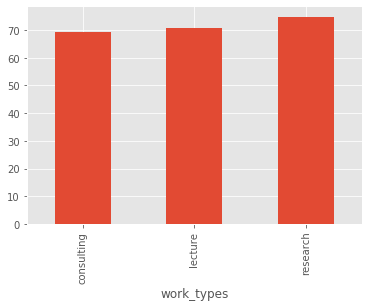

In [155]:
tips_data['tip'].groupby(tips_data['sex']).mean().plot(kind='bar', rot=90)

# show the averages of hour_rates by work_types
print(itinery_df['hour_rates'].groupby(itinery_df['work_types']).mean())

# plot the averages of hour_rates grouped by work_types as a barchart
itinery_df['hour_rates'].groupby(itinery_df['work_types']).mean().plot(kind='bar')

## Part 4:

Create two new columns `cities` and `countries`.

- `cities` refer to the first part in `locations` - before the `,`
- `countries` refer to the second part in `locations`
- note that there is a space after `,` that you need to remove

In [212]:
# define cities as the first part of the string before the comma
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
# pandas.series.str.split
    # pat = String or regular expression to split on. If not specified, split on whitespace
    # n = Limit number of splits in output. None, 0 and -1 will be interpreted as return all splits
    # expand = Expand the splitted strings into separate columns.
            # If True, return DataFrame/MultiIndex expanding dimensionality.
            # If False, return Series/Index, containing lists of strings.

# split the locations based on the comma
# soure: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
split_location = itinery_df['locations'].str.split(pat=',', n=1, expand=True)

# create a new column cities with the first part of the location split before the comma
itinery_df['cities'] = split_location[0]
# create a new column countries with the second part of the location split after the comma
itinery_df['countries'] = split_location[1]

# check if the cities column is added to the dataframe with only the city names
itinery_df

,durations,work_types,locations,hour_rates,payments,cities,countries
0,8,research,"London, England",80.00,640.00,London,England
1,27,research,"Paris, France",70.00,1890.00,Paris,France
2,1,lecture,"Beijing, China",72.29,72.29,Beijing,China
3,24,consulting,"Mumbai, India",61.00,1464.00,Mumbai,India
4,7,consulting,"London, England",63.00,441.00,London,England
5,18,research,"Beijing, China",72.29,1301.22,Beijing,China
6,6,lecture,"Sydney, Australia",95.00,570.00,Sydney,Australia
7,2,lecture,"Madrid, Spain",72.29,144.58,Madrid,Spain
8,5,lecture,"Munich, Germany",50.00,250.00,Munich,Germany
9,17,research,"Madrid, Spain",52.00,884.00,Madrid,Spain


## Part 5:

Visualize the `payments` column, using the rules below:

| Type | Payment |
| ------- | ----- |
| Very Low | 0 - 100 |
| Low | 101 - 200 |
| Medium | 201 - 300 |
| High | 300 + |

Your visualization should look very similar to [this](#Logical-Discretization).

Report which type is the most popular.

In [241]:
# Create buckets based on the rules above, with the last bucket being 300 and above
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

# create bins (only indicate left interval)
new_bucket = [0, 101, 201, 300, 1000000000000]

# cut the payments into different bins with labels assigned for each bin
new_payments_cut = pd.cut(itinery_df['payments'], new_bucket, labels=['Very low: 0-100', 'Low: 101-200', 'Medium: 201-300', 'High: 300+'])

# show result
new_payments_cut

# Result: the most popular payment is category high => > 300 (300+)

0          High: 300+
1          High: 300+
2     Very low: 0-100
3          High: 300+
4          High: 300+
5          High: 300+
6          High: 300+
7        Low: 101-200
8     Medium: 201-300
9          High: 300+
10         High: 300+
11         High: 300+
12         High: 300+
13         High: 300+
14         High: 300+
15         High: 300+
16         High: 300+
17         High: 300+
18         High: 300+
19         High: 300+
Name: payments, dtype: category
Categories (4, object): [Very low: 0-100 < Low: 101-200 < Medium: 201-300 < High: 300+]

# Classwork (start here in class)
You can start working on them right now:
- Read Chapters 7 & 8 in PD4E 
- If time permits, start in on your homework. 
- Ask questions when you need help. Use this time to get help from the professor!

# Homework (do at home)
The following is due before class next week:
  - Any remaining classwork from tonight
  - DataCamp “Case Study - Summer Olympics” assignment
  - Coding assignment part 3

Note: All work on DataCamp is logged. Don't try to fake it!

Please email [me](mailto:jtao@fairfield.edu) if you have any problems or questions.

![DSB logo](img/Dolan.jpg)
# String Data

## PD4E Chapter 8: String and Text Data
### How do you read/manipulate/store data in Python?